### plots for fdgs and nhanes. It just creates a few imputation with sample to show the plotting. In this example I just pass list of pd.df imputed datasets and missing pattern separately, so it might need to be slightly adapted to be used with imputation result object, but shouldn't be much.

In [1]:
import pandas as pd
from plots import stripplot, bwplot, densityplot, densityplot_split, xyplot

def create_imputed_datasets(df, n_imputations=5):
    """
    Creates missing data pattern and multiple imputed datasets using random sampling.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame with potential missing values
    n_imputations : int, optional
        Number of imputed datasets to create. Default is 5
        
    Returns:
    --------
    tuple
        (missing_pattern, imputed_datasets) where:
        - missing_pattern is a DataFrame showing missing (0) vs observed (1) values
        - imputed_datasets is a list of n_imputations imputed DataFrames
    """
    # Create missing data pattern df (0=missing, 1=observed)
    missing_pattern = pd.DataFrame(index=df.index, columns=df.columns)
    for col in df.columns:
        missing_pattern[col] = df[col].isna().map({True: 0, False: 1})
    
    # Create imputed datasets
    imputed_datasets = []
    for i in range(n_imputations):
        # Create a copy of original data
        imputed_df = df.copy()
        
        # Impute each column with missing values
        for col in df.columns:
            missing_mask = missing_pattern[col] == 0
            if missing_mask.any():
                imputed_df.loc[missing_mask, col] = imputed_df[col].dropna().sample(
                    n=missing_mask.sum(),
                    replace=True
                ).values
                
        imputed_datasets.append(imputed_df)
                
    return missing_pattern, imputed_datasets

### Creating imputations

In [2]:
fdgs = pd.read_csv("../data/fdgs.csv")

na_counts = fdgs.isna().sum()

print("Number of NAs in each column:")
for col, count in na_counts.items():
    print(f"{col}: {count}")

# Drop z-score columns
fdgs = fdgs.drop(['hgt.z', 'wgt.z', 'id'], axis=1)

# Create imputed datasets
missing_pattern, imputed_datasets = create_imputed_datasets(fdgs)

print("\nCreated imputed datasets")
print(f"Type of imputed_datasets: {type(imputed_datasets)}")
print(f"Type of each element in imputed_datasets {type(imputed_datasets[0])}")
print(f"Number of imputed datasets: {len(imputed_datasets)}")
print("\nShape of each imputed dataset:")
for i, df in enumerate(imputed_datasets):
    print(f"Dataset {i+1}: {df.shape}")
print("\nColumns in each dataset:", imputed_datasets[0].columns.tolist())


nhanes = pd.read_csv("../data/nhanes.csv")

na_counts = nhanes.isna().sum()

print("Number of NAs in each column:")
for col, count in na_counts.items():
    print(f"{col}: {count}")

# Create imputed datasets
missing_pattern_nh, imputed_datasets_nh = create_imputed_datasets(nhanes)

print("\nCreated imputed datasets")
print("\nColumns in each dataset:", imputed_datasets_nh[0].columns.tolist())


Number of NAs in each column:
id: 0
reg: 0
age: 0
sex: 0
hgt: 23
wgt: 20
hgt.z: 23
wgt.z: 20

Created imputed datasets
Type of imputed_datasets: <class 'list'>
Type of each element in imputed_datasets <class 'pandas.core.frame.DataFrame'>
Number of imputed datasets: 5

Shape of each imputed dataset:
Dataset 1: (10030, 5)
Dataset 2: (10030, 5)
Dataset 3: (10030, 5)
Dataset 4: (10030, 5)
Dataset 5: (10030, 5)

Columns in each dataset: ['reg', 'age', 'sex', 'hgt', 'wgt']
Number of NAs in each column:
age: 0
bmi: 9
hyp: 8
chl: 10

Created imputed datasets

Columns in each dataset: ['age', 'bmi', 'hyp', 'chl']


### Displaying diagnostic plots

#### fdgs

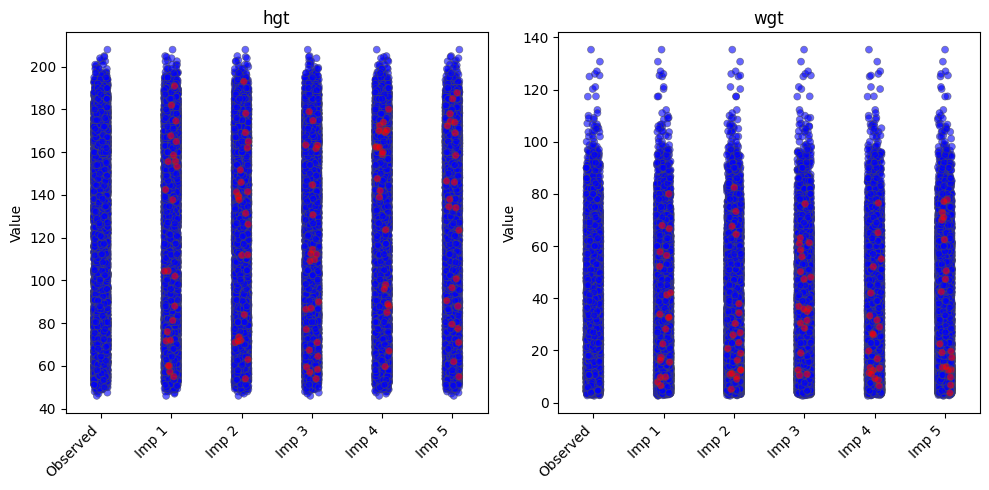

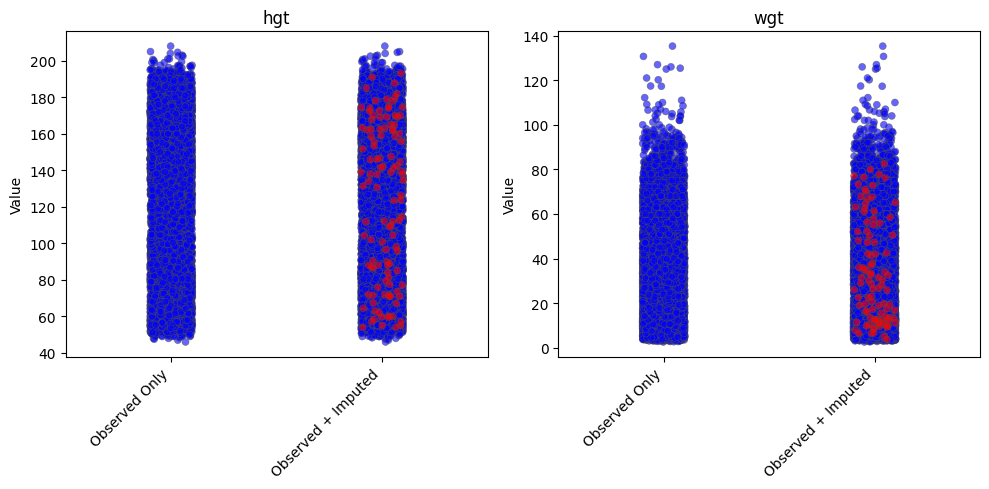

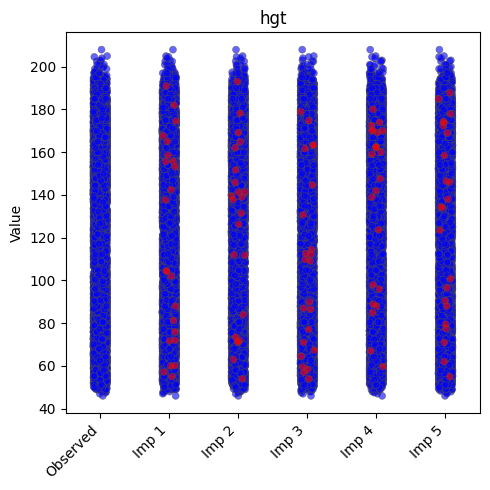

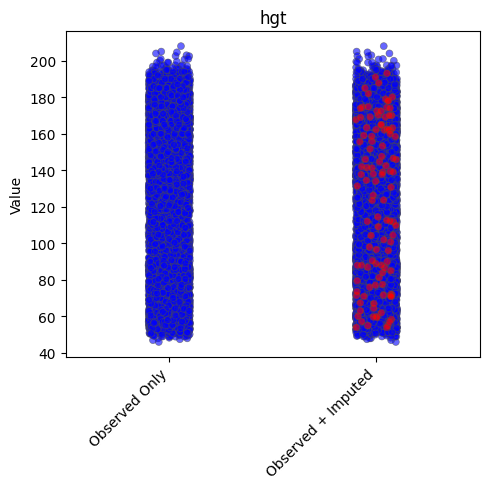

In [3]:
stripplot(imputed_datasets=imputed_datasets,
          missing_pattern=missing_pattern)

stripplot(imputed_datasets=imputed_datasets,
          missing_pattern=missing_pattern,
          merge_imputations=True)

stripplot(imputed_datasets=imputed_datasets,
          missing_pattern=missing_pattern,
          columns=['hgt'])

stripplot(imputed_datasets=imputed_datasets,
          missing_pattern=missing_pattern,
          columns=['hgt'],
          merge_imputations=True)

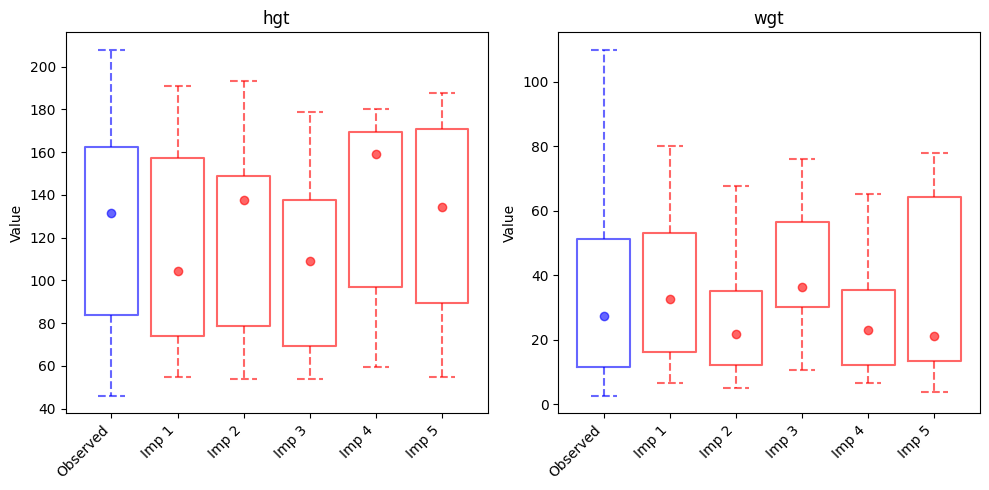

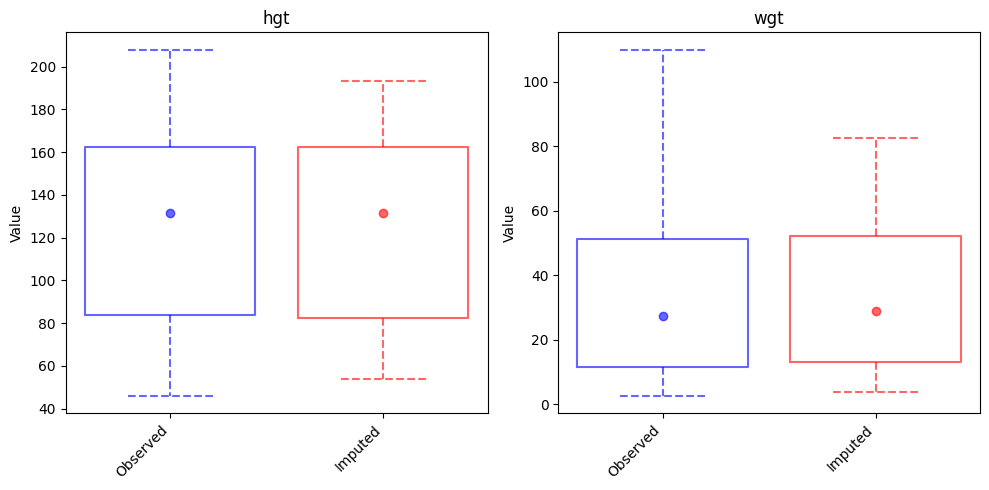

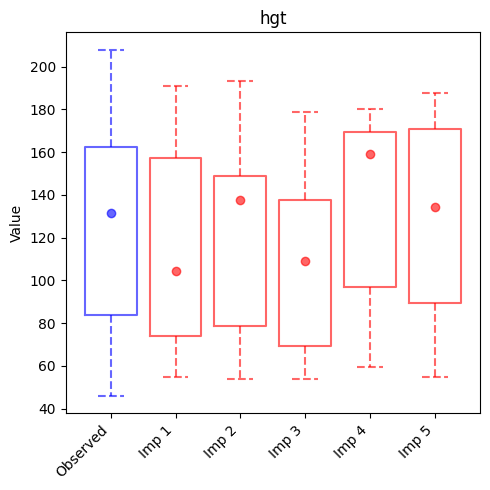

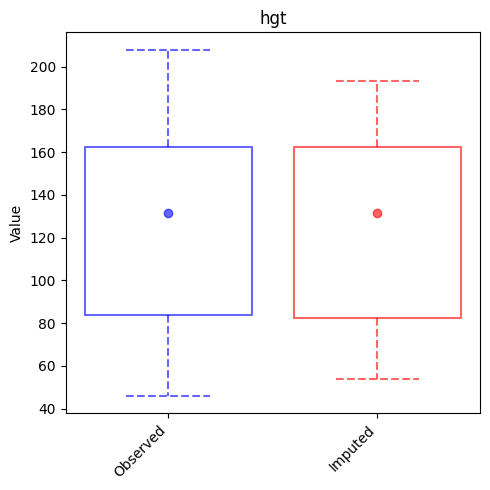

In [4]:
bwplot(imputed_datasets=imputed_datasets,
          missing_pattern=missing_pattern)

bwplot(imputed_datasets=imputed_datasets,
          missing_pattern=missing_pattern,
          merge_imputations=True)

bwplot(imputed_datasets=imputed_datasets,
          missing_pattern=missing_pattern,
          columns=['hgt'])

bwplot(imputed_datasets=imputed_datasets,
          missing_pattern=missing_pattern,
          columns=['hgt'], 
          merge_imputations=True)

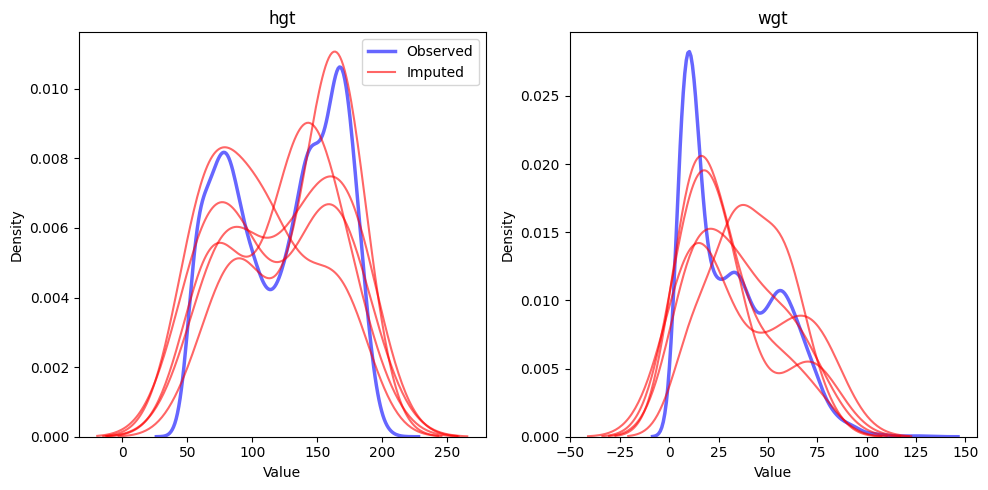

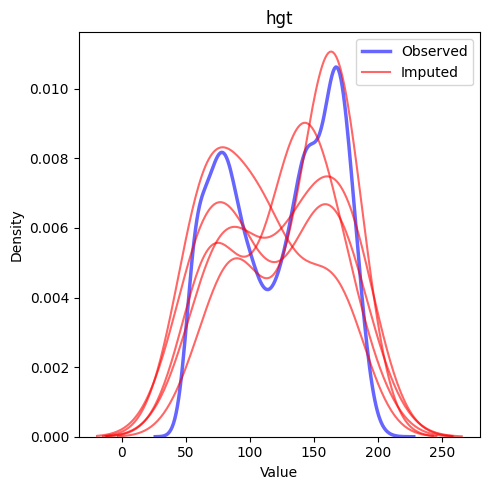

In [5]:
densityplot(imputed_datasets=imputed_datasets,
          missing_pattern=missing_pattern)
densityplot(imputed_datasets=imputed_datasets,
          missing_pattern=missing_pattern,
          columns=['hgt'])

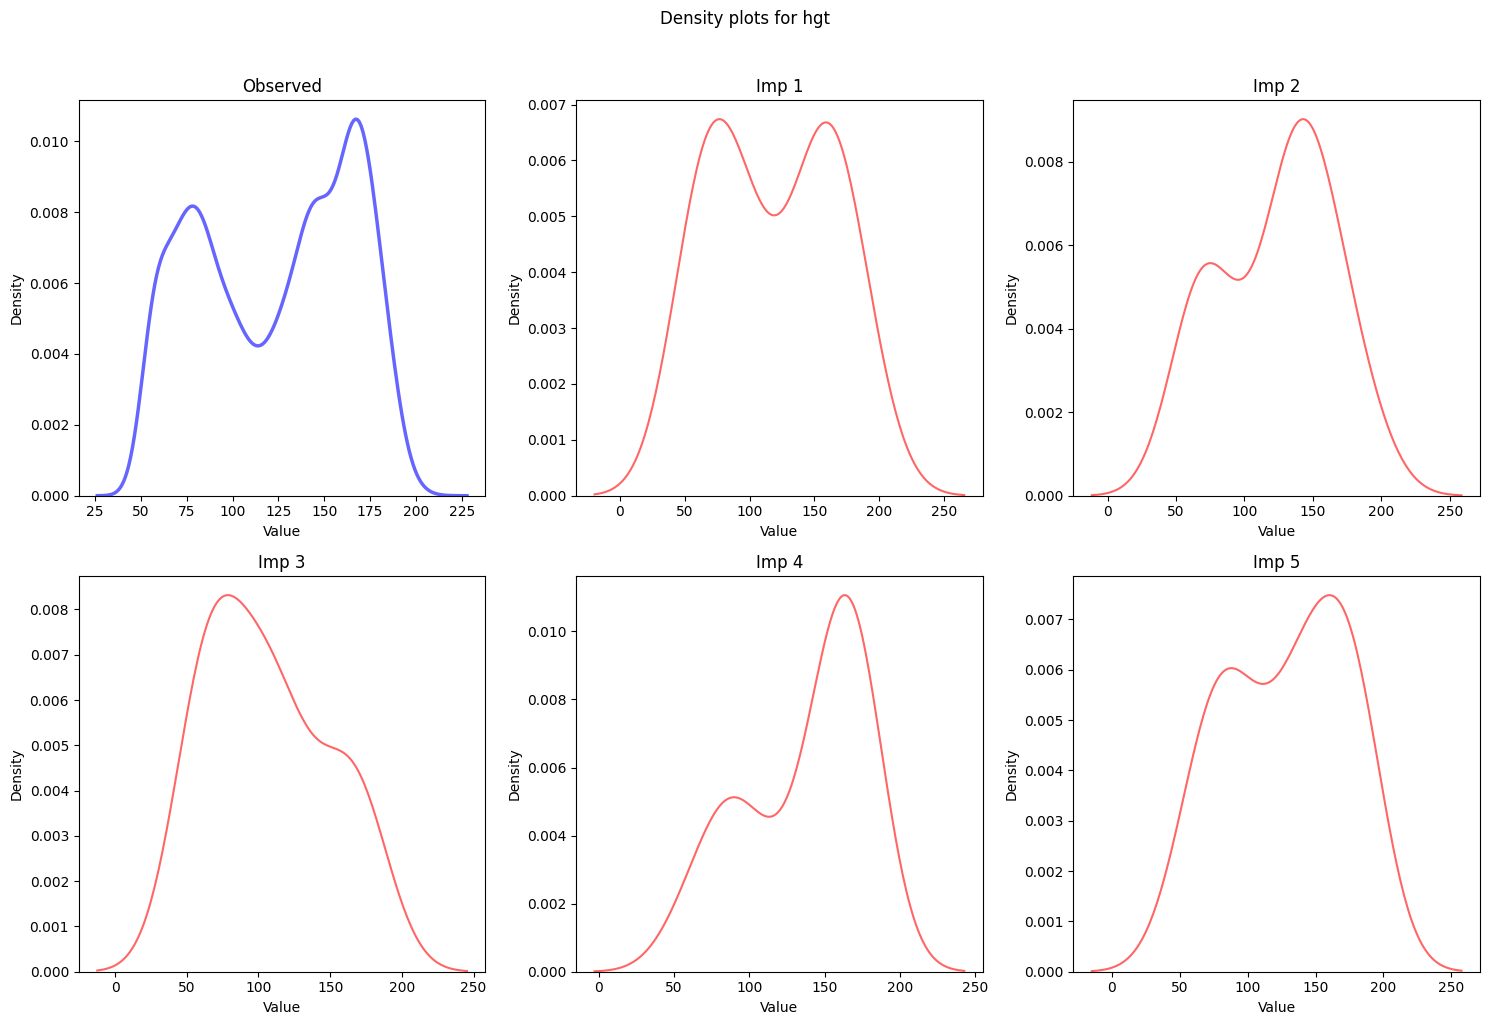

In [6]:
densityplot_split(imputed_datasets=imputed_datasets,
          missing_pattern=missing_pattern,
          column='hgt')

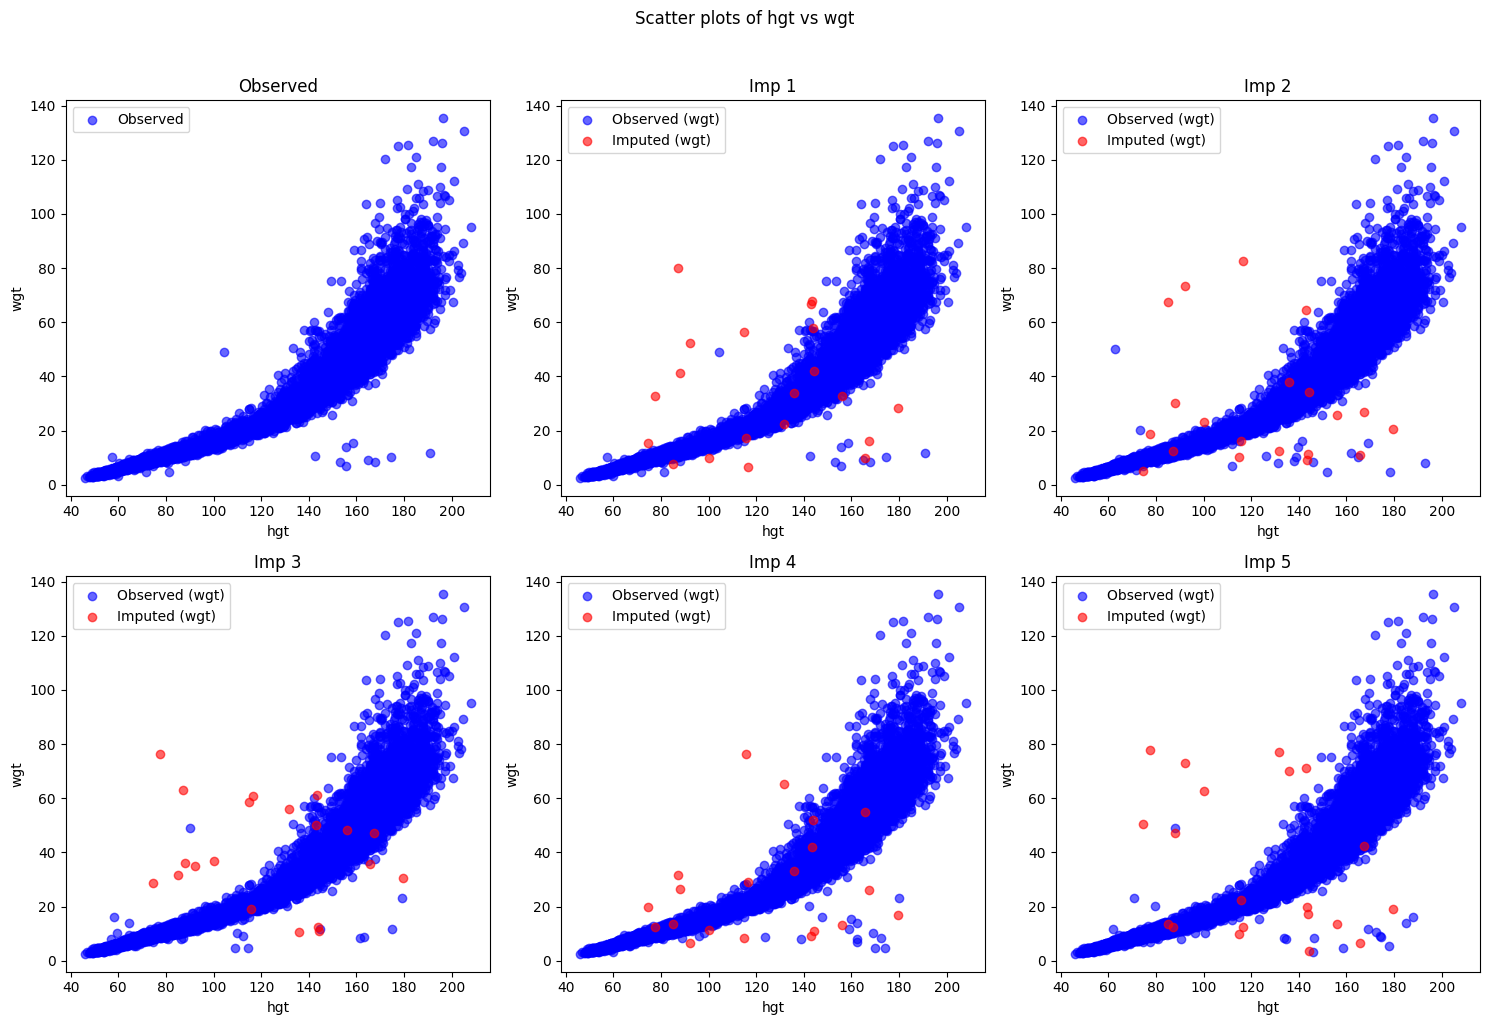

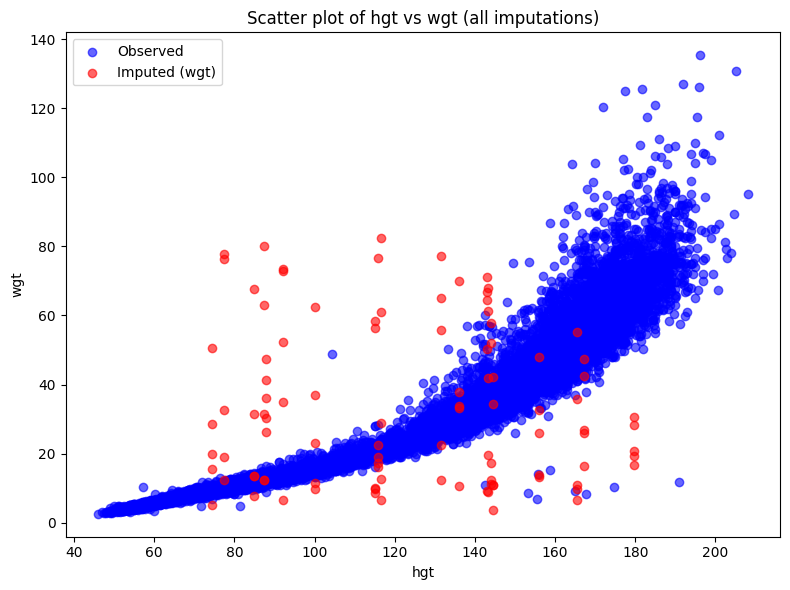

In [7]:
xyplot(imputed_datasets=imputed_datasets,
       missing_pattern=missing_pattern,
       x = 'hgt',
       y = 'wgt')

xyplot(imputed_datasets=imputed_datasets,
       missing_pattern=missing_pattern,
       x = 'hgt',
       y = 'wgt',
       merge_imputations=True)


#### nhanes

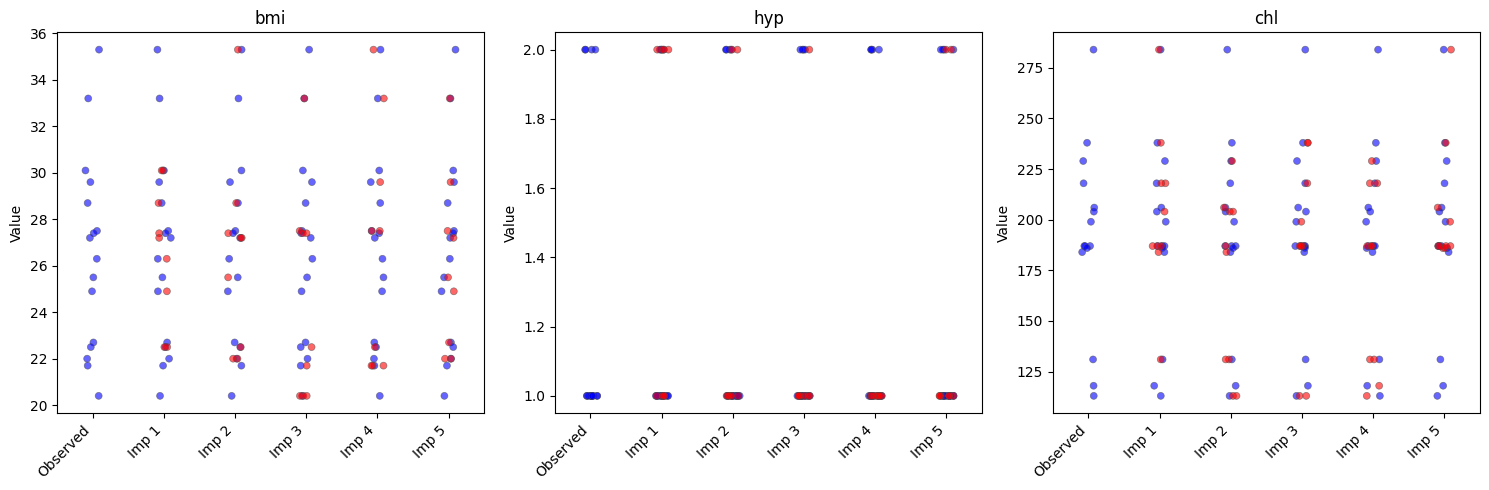

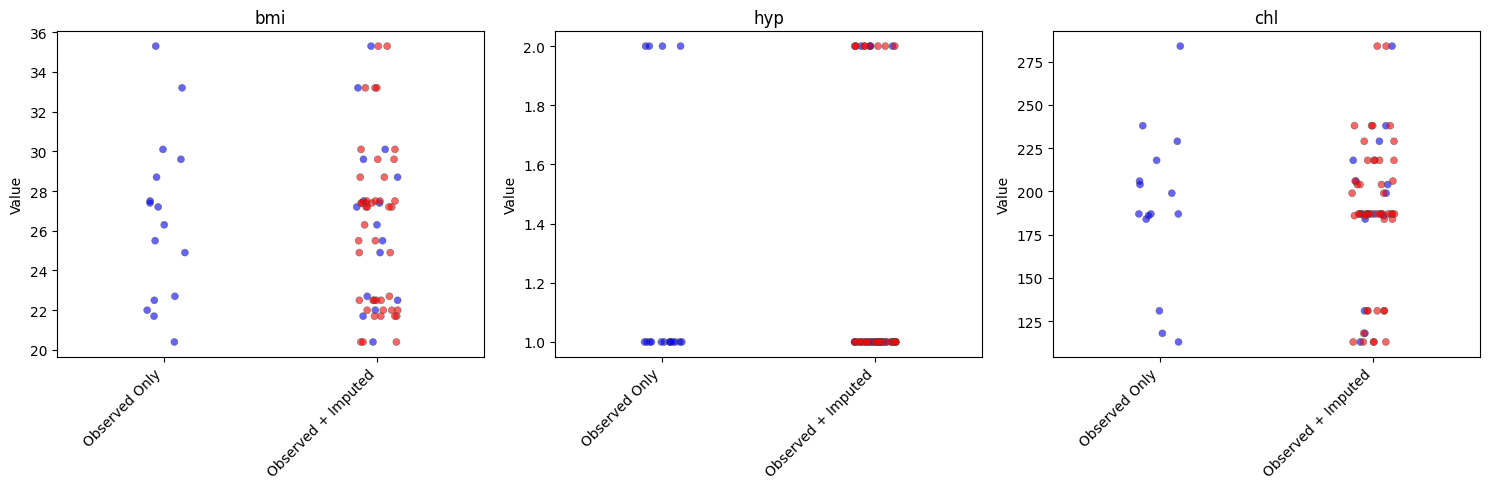

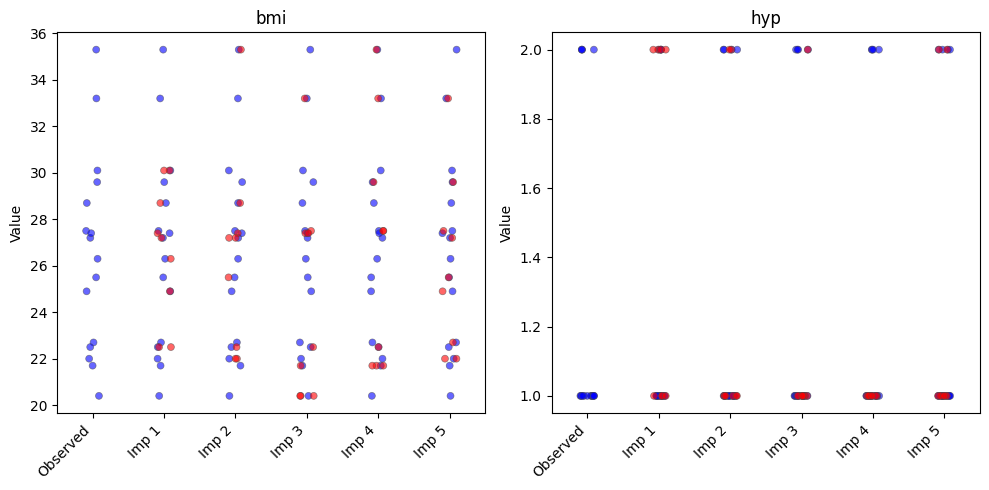

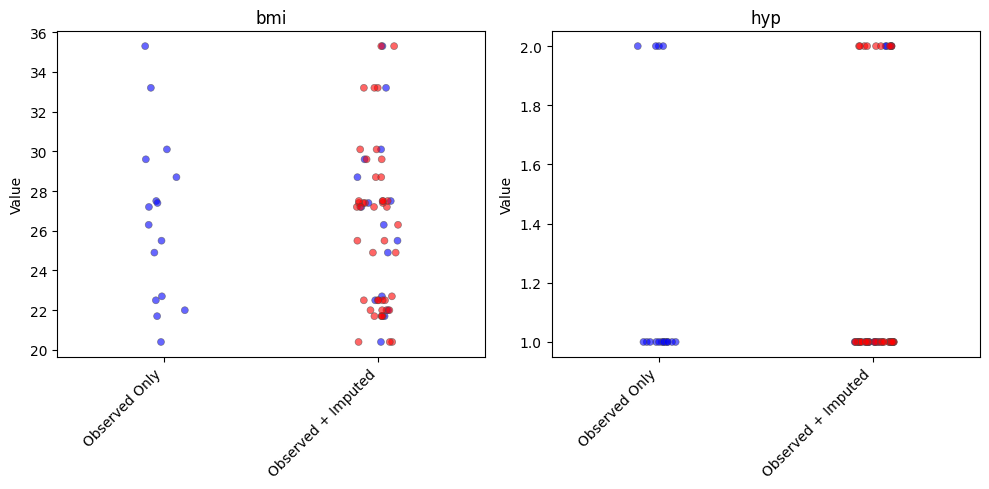

In [8]:
stripplot(imputed_datasets=imputed_datasets_nh,
          missing_pattern=missing_pattern_nh)

stripplot(imputed_datasets=imputed_datasets_nh,
          missing_pattern=missing_pattern_nh,
          merge_imputations=True)

stripplot(imputed_datasets=imputed_datasets_nh,
          missing_pattern=missing_pattern_nh,
          columns=['bmi', 'hyp'])

stripplot(imputed_datasets=imputed_datasets_nh,
          missing_pattern=missing_pattern_nh,
          columns=['bmi', 'hyp'],
          merge_imputations=True)


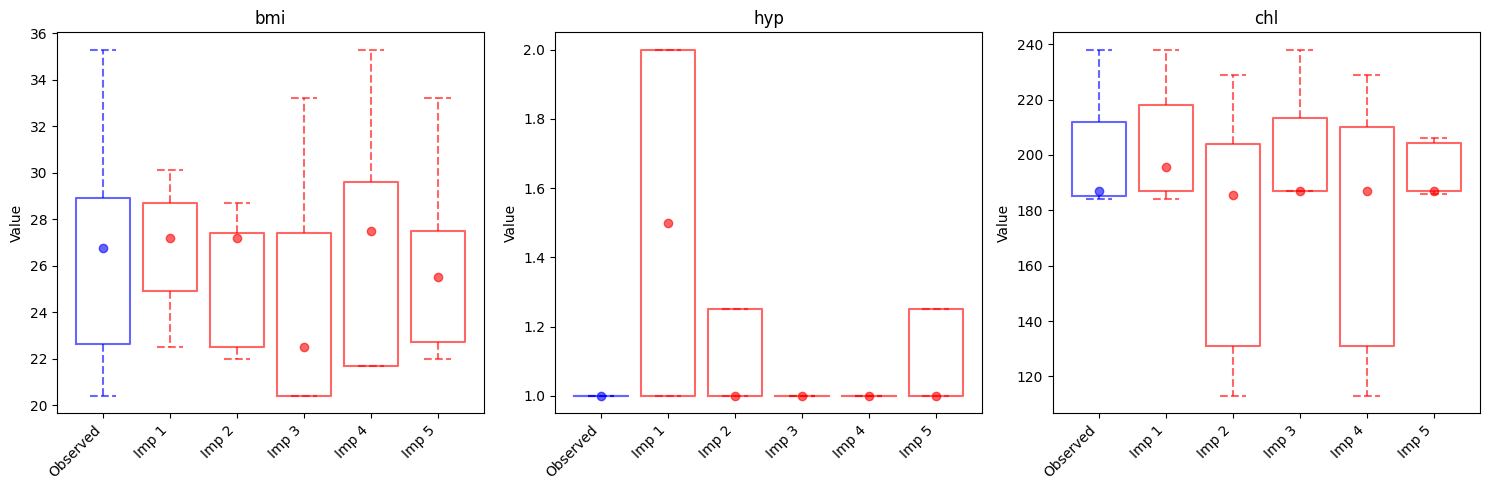

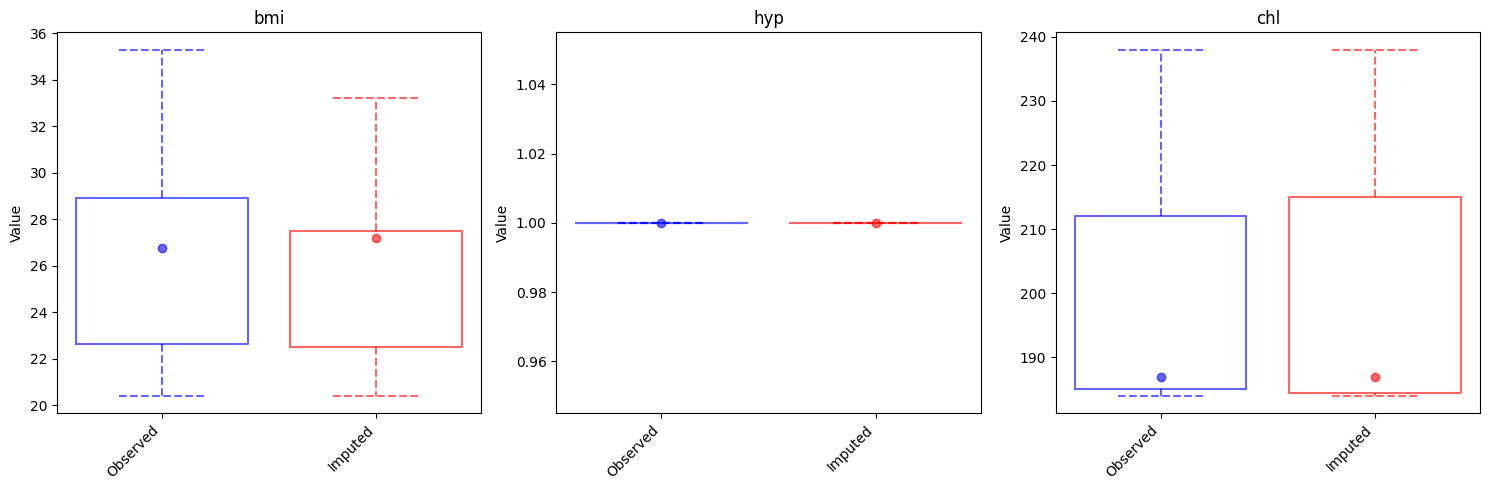

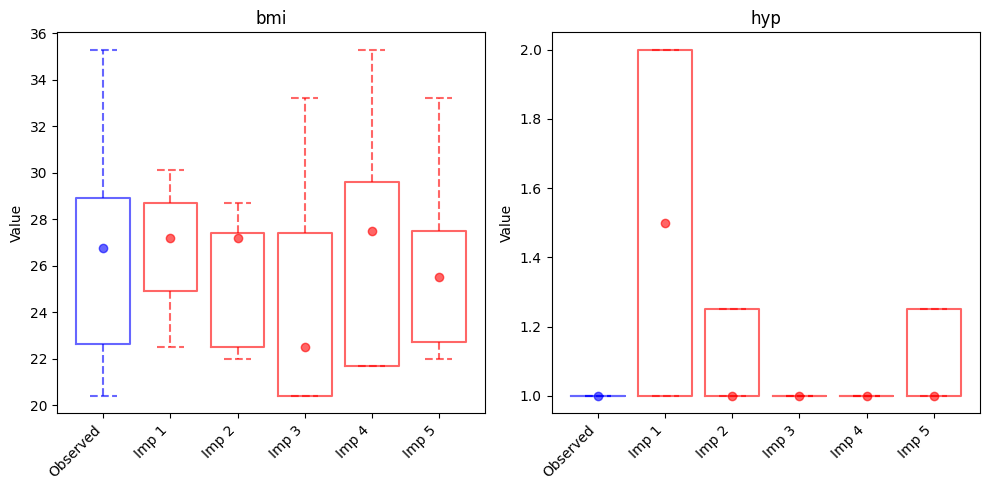

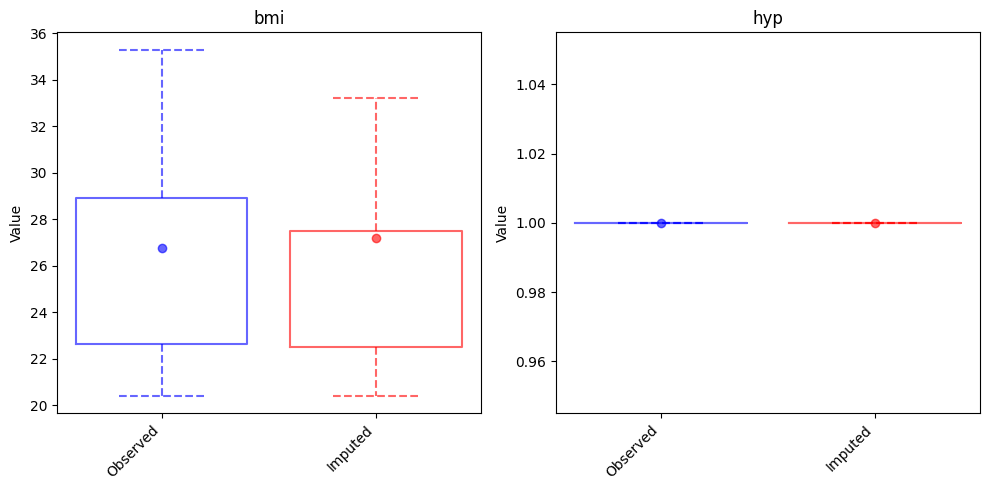

In [9]:
bwplot(imputed_datasets=imputed_datasets_nh,
          missing_pattern=missing_pattern_nh)

bwplot(imputed_datasets=imputed_datasets_nh,
          missing_pattern=missing_pattern_nh,
          merge_imputations=True)

bwplot(imputed_datasets=imputed_datasets_nh,
          missing_pattern=missing_pattern_nh,
          columns=['bmi', 'hyp'])

bwplot(imputed_datasets=imputed_datasets_nh,
            missing_pattern=missing_pattern_nh,
            columns=['bmi', 'hyp'],
            merge_imputations=True)

/Users/zhanna/Desktop/diagnostics/plots.py:365: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=imp_values, ax=ax, color=imputed_color, label=label, alpha=0.6)


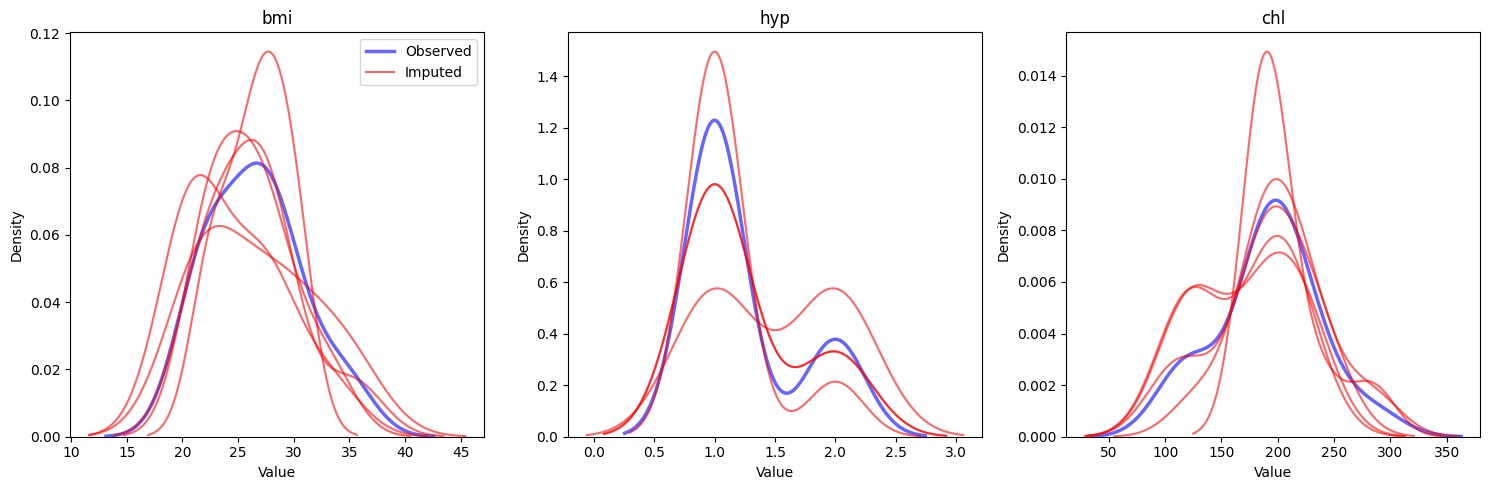

/Users/zhanna/Desktop/diagnostics/plots.py:365: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=imp_values, ax=ax, color=imputed_color, label=label, alpha=0.6)


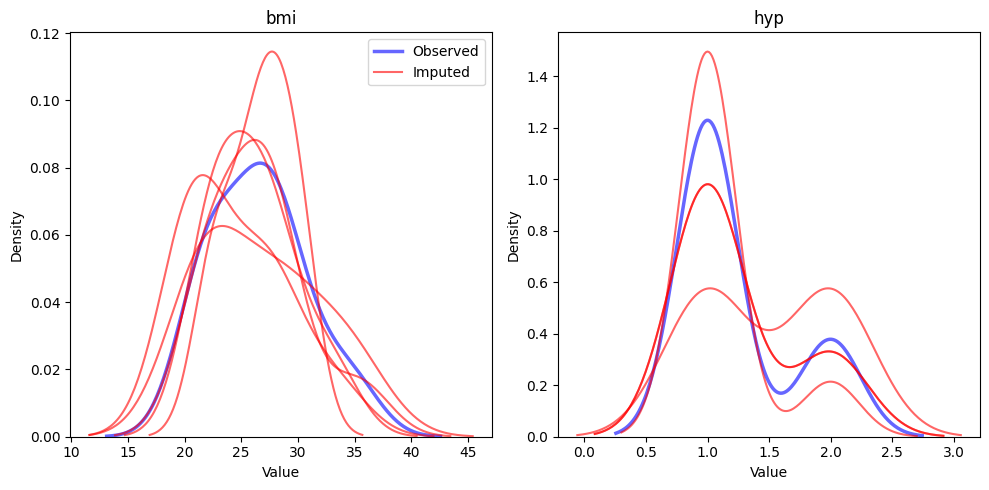

In [10]:
densityplot(imputed_datasets=imputed_datasets_nh,
          missing_pattern=missing_pattern_nh)

densityplot(imputed_datasets=imputed_datasets_nh,
          missing_pattern=missing_pattern_nh,
          columns=['bmi', 'hyp'])

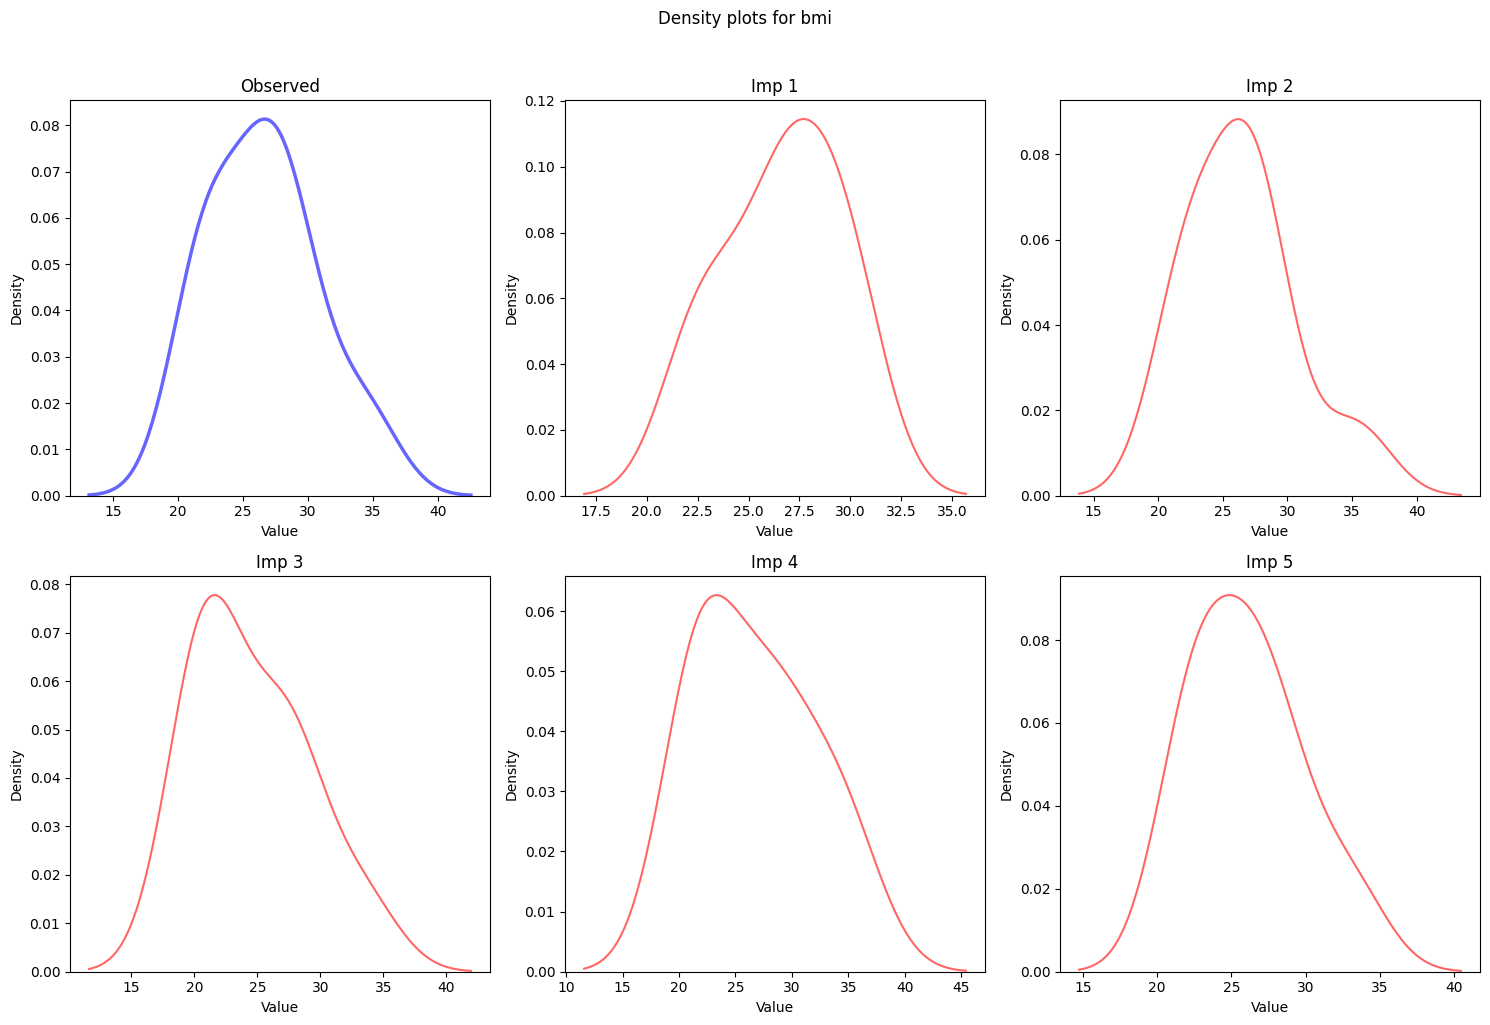

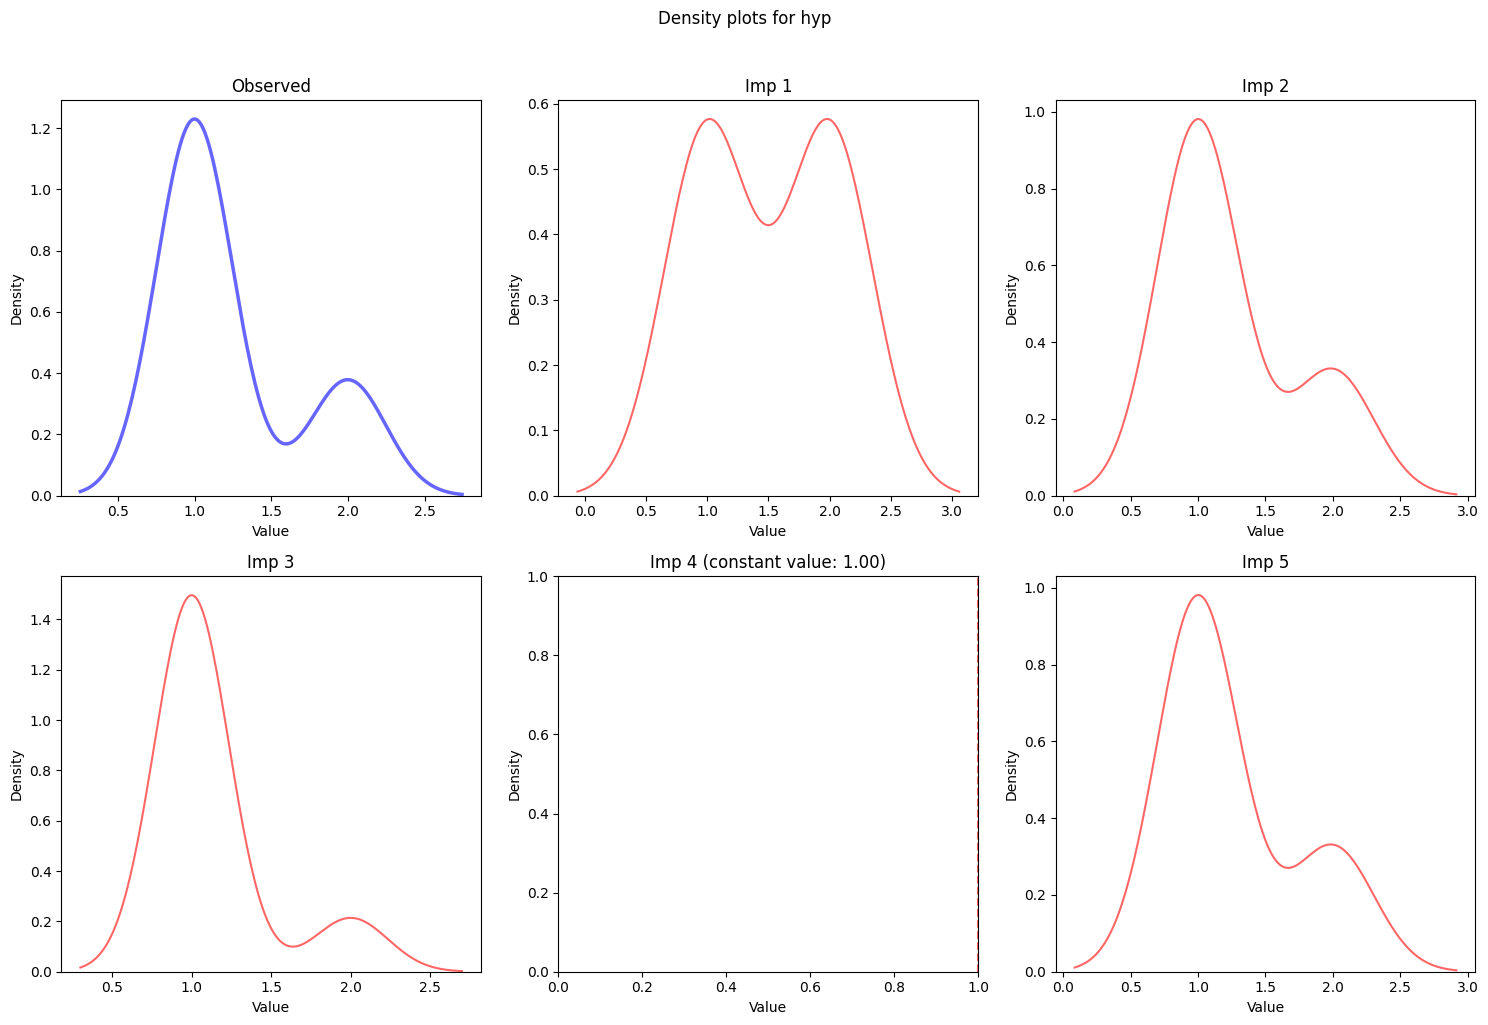

In [11]:
densityplot_split(imputed_datasets=imputed_datasets_nh,
          missing_pattern=missing_pattern_nh,
          column='bmi')
densityplot_split(imputed_datasets=imputed_datasets_nh,
          missing_pattern=missing_pattern_nh,
          column='hyp')

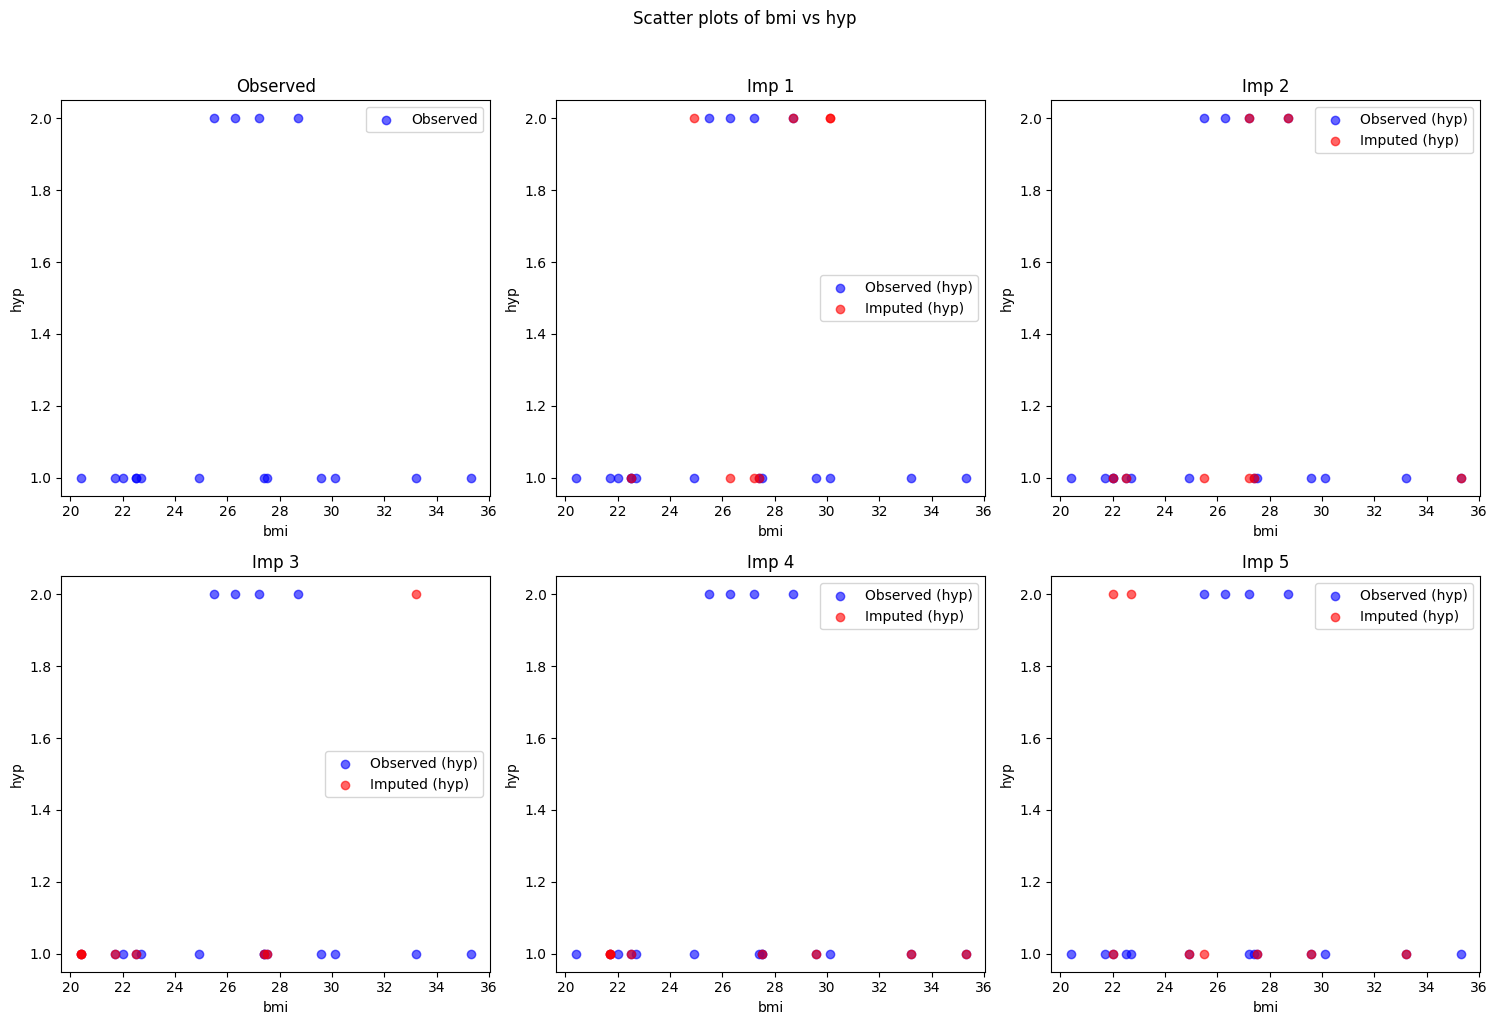

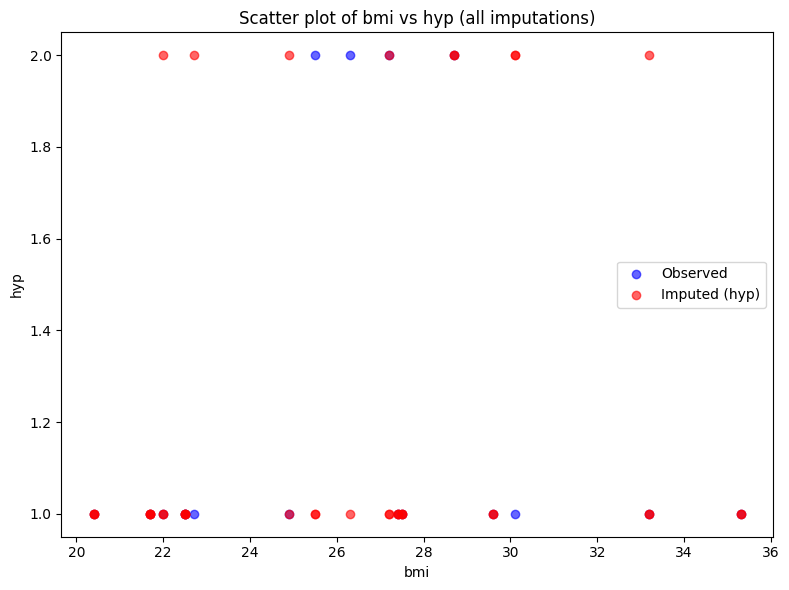

In [12]:
xyplot(imputed_datasets=imputed_datasets_nh,
       missing_pattern=missing_pattern_nh,
       x = 'bmi',
       y = 'hyp')

xyplot(imputed_datasets=imputed_datasets_nh,
       missing_pattern=missing_pattern_nh,
       x = 'bmi',
       y = 'hyp',
       merge_imputations=True)